In [ ]:
# installing necessary packages
!pip install yfinance

     |████████████████████████████████| 5.5MB 11.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=2eb94b2a54aa34fab7f4dcf779ac7062a8cda44e02f53d339732f1436b1c804b
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# importing necessary libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from scipy import stats
import yfinance as yf
import os
import statistics
import statsmodels.api as sm 
import scipy

In [ ]:
# Defining tiem series to download from yahoo finance: 
start_date = "2014-01-21"
end_date = "2019-12-13"
ticker = "UPS"
ups_equity = yf.download(ticker, start_date, end_date, progress= False)
ups_equity.head()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-21,100.459999,100.589996,97.540001,98.570000,79.019585,5783200
2014-01-22,99.260002,99.360001,98.500000,98.989998,79.356285,3234100
2014-01-23,98.389999,98.540001,97.610001,97.940002,78.514534,4255100
2014-01-24,97.580002,97.690002,96.279999,96.330002,77.223846,5251600
2014-01-27,96.139999,96.620003,95.010002,95.169998,76.293945,4973700


In [ ]:
#Compute the continuously compounded daily returns and the continuously compounded monthly returns. 
# Compute descriptive statistics: sample moments (mean, standard deviation, skewness, and kurtosis) 
# and sample quantiles (min value, median, max value) for each return series.

class stock_analyzer:

  def __init__(self, data, stock_ticker):
    self.data = data
    self.stock_ticker = stock_ticker
  
  def sample_mean(self):
    return(sum(self.data)/(len(self.data)-1))

  def sample_variance(self):
    return (sum((self.data - self.sample_mean())**2))/(len(self.data)-1)
    
  
  def sample_std(self):
    return (self.sample_variance())**(1/2)
  
  def sample_skewness(self):
    return(((sum((self.data - self.sample_mean())**3))/(len(self.data)-1))/((self.sample_variance())**(3/2)))
    
  def sample_kurtosis(self):
    return(((sum((self.data - self.sample_mean())**4))/(len(self.data)-1))/((self.sample_variance())**(2)))
  

  def report(self):
    intro = "Stock Analyzer report for: "
    print("#"*(len(intro)+15))
    print(intro + self.stock_ticker)
    print("Sample mean is: {:.6f}".format(self.sample_mean()))
    print("Sample variance is: {:.6f}".format(self.sample_variance()))
    print("Sample standard deviation is: {:.6f}".format(self.sample_std()))
    print("Sample skewness is: {:.6f}".format(self.sample_skewness()))
    print("Sample kurtosis is: {:.6f}".format(self.sample_kurtosis()))
    print("#"*(len(intro)+15))
    print("Sample quantiles for: " + self.stock_ticker)
    print("Min value is: {:.6f}".format(min(self.data)))
    print("Median value is: {:.6f}".format(statistics.median(self.data)))
    print("Max value is: {:.6f}".format(max(self.data)))
    #"{:.2f}".format(value)

## Task 1: Calculate continuously compounded returns:
Compute the continuously compounded daily returns and the continuously compounded monthly returns. Compute descriptive statistics: sample moments (mean, standard deviation, skewness, and kurtosis) and sample quantiles (min value, median, max value) for each return series.


In [ ]:
# Transform data into numpy array: 
ups_px_array = np.array(ups_equity['Adj Close'])
# Take a natural log at each data point: 
log_ups_px = np.log(ups_px_array)

# Calculate daily continuously compounded return: 
daily_comp_cont_return_ups = log_ups_px[1:len(log_ups_px)] - log_ups_px[0:len(log_ups_px)-1]

# Calculate monthly continuously compounded return:
# Recalibrate data into months: 
monthly_log_ups_px = log_ups_px[0:len(log_ups_px):22] 
# Calculating the return: 
monthly_comp_cont_return_ups = monthly_log_ups_px[1:len(monthly_log_ups_px)] - monthly_log_ups_px[0:len(monthly_log_ups_px)-1]

In [ ]:
ups_stock_analyzer_daily = stock_analyzer(daily_comp_cont_return_ups, "UPS")

In [ ]:
ups_stock_analyzer_daily.report()

##########################################
Stock Analyzer report for: UPS
Sample mean is: 0.000238
Sample variance is: 0.000147
Sample standard deviation is: 0.012129
Sample skewness is: -0.670163
Sample kurtosis is: 13.630679
##########################################
Sample quantiles for: UPS
Min value is: -0.104340
Median value is: 0.000592
Max value is: 0.083085


In [ ]:
ups_stock_analyzer_monthly = stock_analyzer(monthly_comp_cont_return_ups, "UPS")

In [ ]:
ups_stock_analyzer_monthly.report()

##########################################
Stock Analyzer report for: UPS
Sample mean is: 0.005890
Sample variance is: 0.003741
Sample standard deviation is: 0.061165
Sample skewness is: -0.730282
Sample kurtosis is: 5.078410
##########################################
Sample quantiles for: UPS
Min value is: -0.231479
Median value is: -0.002416
Max value is: 0.120179


Text(0.5, 0, 'Data')

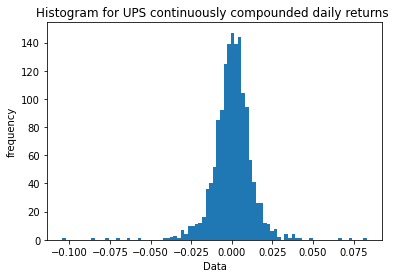

In [ ]:
plt.hist(daily_comp_cont_return_ups, bins=85)
plt.title("Histogram for UPS continuously compounded daily returns ")
plt.ylabel('frequency')
plt.xlabel('Data')

Text(0.5, 0, 'Date')

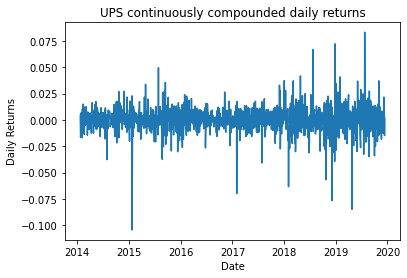

In [ ]:
plt.plot(ups_equity.iloc[1:].index, daily_comp_cont_return_ups)
plt.title('UPS continuously compounded daily returns')
plt.ylabel("Daily Returns")
plt.xlabel('Date')

Text(0.5, 0, 'Date')

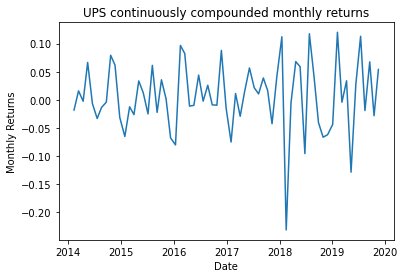

In [ ]:
plt.plot(ups_equity[15:len(ups_equity):22].index, monthly_comp_cont_return_ups)
plt.title('UPS continuously compounded monthly returns')
plt.ylabel("Monthly Returns")
plt.xlabel('Date')

In [ ]:
ups_equity[15:len(ups_equity):22].index

#len(monthly_comp_cont_return_ups)

67

In [ ]:
len(monthly_comp_cont_return_ups)

67

((array([-3.30989381, -3.05302953, -2.91020593, ...,  2.91020593,
          3.05302953,  3.30989381]),
  array([-0.1043399 , -0.0847656 , -0.07660037, ...,  0.06673728,
          0.07209563,  0.08308523])),
 (0.011525870158385647, 0.000237721190527503, 0.9487341332842438))

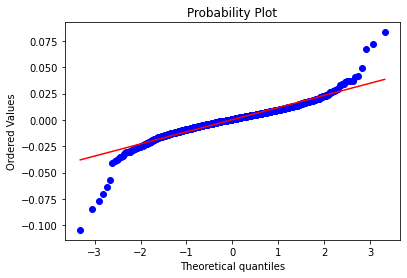

In [ ]:
scipy.stats.probplot(daily_comp_cont_return_ups, dist='norm', plot=plt)

#scipy.stats.probplot(measurements, dist="norm", plot=matplotlib.pyplot)

((array([-2.3155235 , -1.96037689, -1.75277426, -1.60121291, -1.47945489,
         -1.37636782, -1.28613259, -1.20530443, -1.13166617, -1.06370178,
         -1.00032589, -0.94073275, -0.88430639, -0.83056423, -0.7791203 ,
         -0.72966029, -0.68192422, -0.63569402, -0.59078441, -0.54703616,
         -0.50431093, -0.4624873 , -0.42145767, -0.38112577, -0.34140471,
         -0.3022153 , -0.26348479, -0.22514567, -0.18713478, -0.14939245,
         -0.11186181, -0.07448813, -0.03721824,  0.        ,  0.03721824,
          0.07448813,  0.11186181,  0.14939245,  0.18713478,  0.22514567,
          0.26348479,  0.3022153 ,  0.34140471,  0.38112577,  0.42145767,
          0.4624873 ,  0.50431093,  0.54703616,  0.59078441,  0.63569402,
          0.68192422,  0.72966029,  0.7791203 ,  0.83056423,  0.88430639,
          0.94073275,  1.00032589,  1.06370178,  1.13166617,  1.20530443,
          1.28613259,  1.37636782,  1.47945489,  1.60121291,  1.75277426,
          1.96037689,  2.3155235 ]),
 

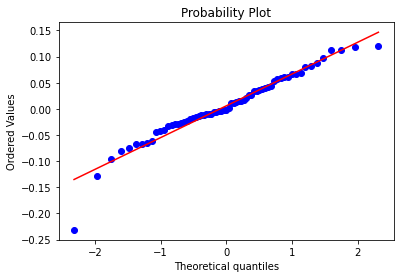

In [ ]:
scipy.stats.probplot(monthly_comp_cont_return_ups, dist='norm', plot=plt)

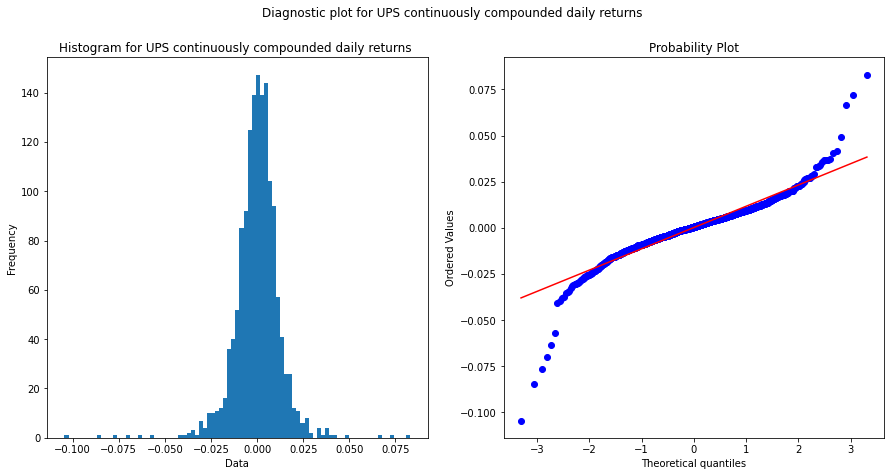

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

fig.suptitle('Diagnostic plot for UPS continuously compounded daily returns')
ax1.hist(daily_comp_cont_return_ups, bins=85)
ax1.set_title("Histogram for UPS continuously compounded daily returns ")
ax1.set_xlabel('Data')
ax1.set_ylabel('Frequency')

fig.ax2 = scipy.stats.probplot(daily_comp_cont_return_ups, dist='norm', plot=plt)



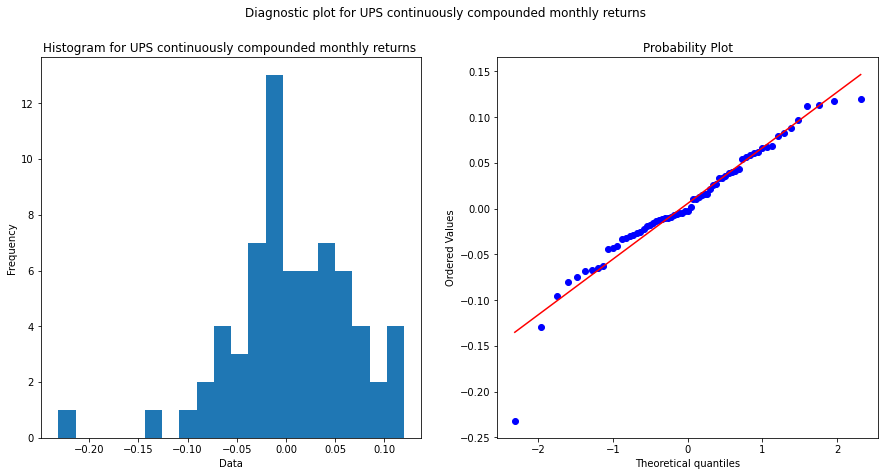

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

fig.suptitle('Diagnostic plot for UPS continuously compounded monthly returns')
ax1.hist(monthly_comp_cont_return_ups, bins=20)
ax1.set_title("Histogram for UPS continuously compounded monthly returns ")
ax1.set_xlabel('Data')
ax1.set_ylabel('Frequency')

fig.ax2 = scipy.stats.probplot(monthly_comp_cont_return_ups, dist='norm', plot=plt)